# Examples of different walks

In [1]:
%matplotlib inline

In [2]:
# Fix path to have the root of the 'reluctant_walks' package
import sys
sys.path.append("..")

In [3]:
import matplotlib.pyplot as plt

import reluctant_walks

from reluctant_walks import Step, StepSet
from reluctant_walks.compilers.genrgens import GenRGenSWalkCompiler
from reluctant_walks.compilers.combstruct import CombstructWalkCompiler

from reluctant_walks.reference import is_quarter_plane, get_nontrivial_qw_model, POSSIBLE_NT_SLOPES

from reluctant_walks.graphics import plot_walk
from reluctant_walks.graphics import plot_walk_region

from reluctant_walks.graphics import plot_stepsets, plot_stepset

In [4]:
plt.rcParams['figure.figsize'] = [6.0, 6.0]

In [5]:
by_best_slope = list(POSSIBLE_NT_SLOPES)
if 0 in by_best_slope:
    del by_best_slope[by_best_slope.index(0)]
models_1 = get_nontrivial_qw_model(by_drift=[-1], by_size=[4, 5, 6], by_best_slope=by_best_slope)
models_2 = get_nontrivial_qw_model(by_drift=[-2], by_size=[4, 5, 6], by_best_slope=by_best_slope)
models = models_1
model = models[2]
model

{'best_slope': (3, 1),
 'coord': (4, 10),
 'drift': -1,
 'id': 17,
 'size': 4,
 'steps': [(0, 1), (1, -1), (-1, -1), (-1, 1)],
 'stepset': StepSet
     Z61: ( 0, +1) weight: 1
     Z62: (+1, -1) weight: -1
     Z63: (-1, -1) weight: -1
     Z64: (-1, +1) weight: 1
 }

11

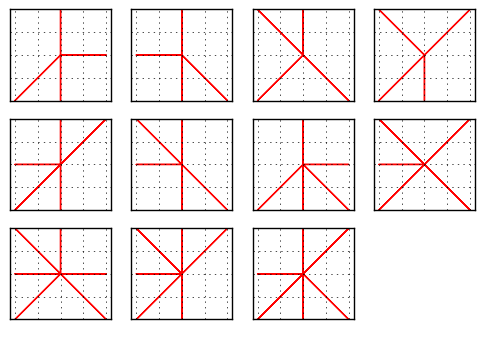

In [7]:
ax = plot_stepsets(map(lambda x: x['stepset'], models_1))
len(models_1)

8

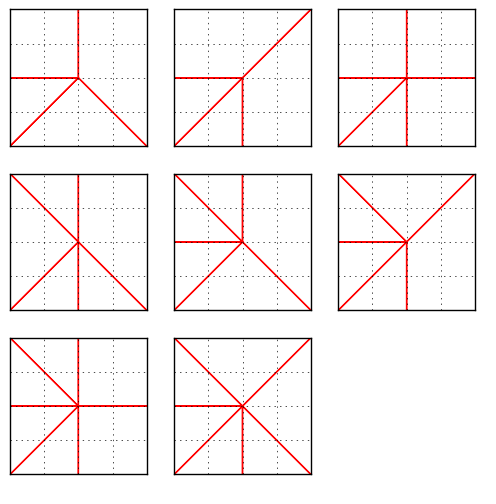

In [9]:
ax = plot_stepsets(map(lambda x: x['stepset'], models_2))
len(models_2)

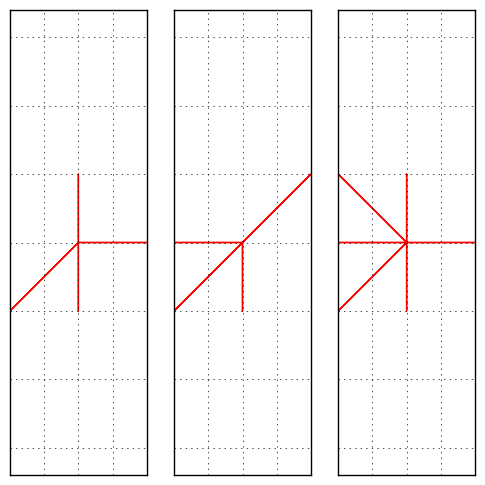

In [11]:
sel_models = [models_1[0]['stepset'],
              models_2[1]['stepset'],
              models_2[6]['stepset']]
ax = plot_stepsets(sel_models, side=3)

# Plotting different models

In [12]:
a_ssp = sel_models[0]
a_ssp.slope = a_ssp.get_best_slope()
a_ggwc = GenRGenSWalkCompiler(a_ssp)
a_u_walks = a_ggwc.generate(100, 2000)
a_r_walks = filter(is_quarter_plane, a_u_walks)
a_b_walks = filter(lambda w: not is_quarter_plane(w), a_u_walks)

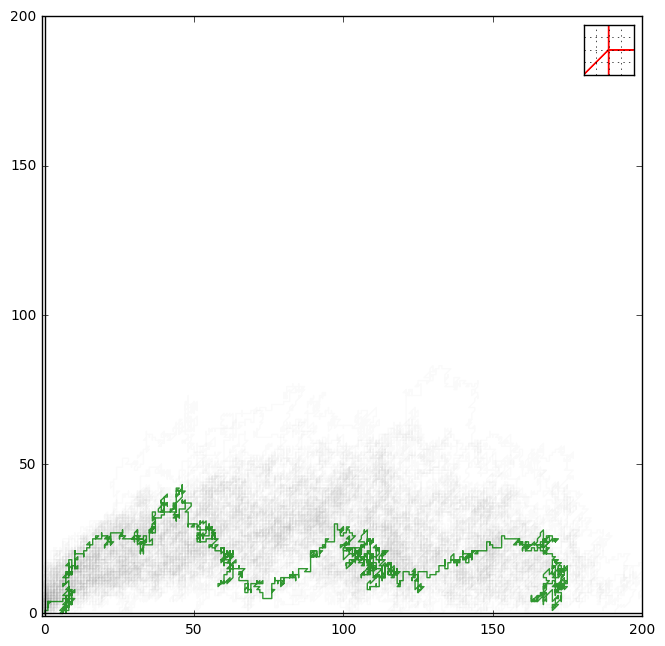

In [13]:
(afig, aax) = plot_walk_region(a_b_walks + [a_r_walks[0]], borders=(-1,-1, 200, 200), inset_stepset=a_ssp, inset_loc=1)

In [14]:
b_ssp = sel_models[1]
b_ssp.slope = b_ssp.get_best_slope()
b_ggwc = GenRGenSWalkCompiler(b_ssp)
b_u_walks = b_ggwc.generate(100, 2000)
b_r_walks = filter(is_quarter_plane, b_u_walks)
b_b_walks = filter(lambda w: not is_quarter_plane(w), b_u_walks)

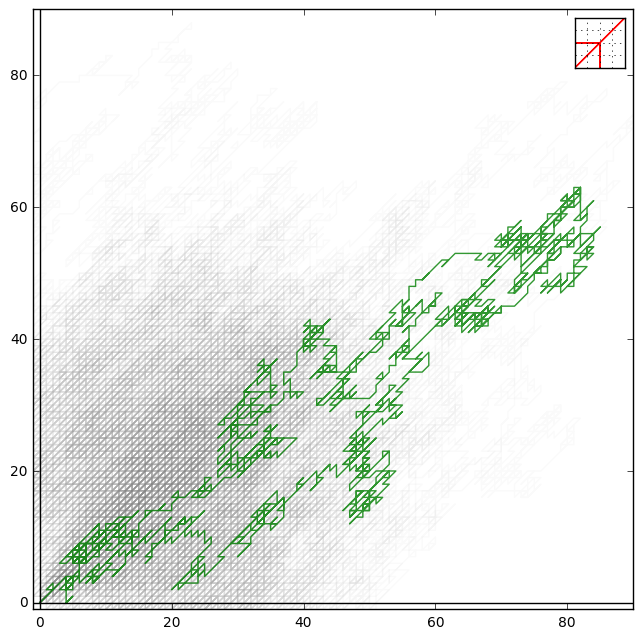

In [15]:
(bfig, bax) = plot_walk_region(b_b_walks + [b_r_walks[3]], borders=(-1,-1, 90, 90), inset_stepset=b_ssp, inset_loc=1)

In [16]:
c_ssp = sel_models[2]
c_ssp.slope = c_ssp.get_best_slope()
c_ggwc = GenRGenSWalkCompiler(c_ssp)
c_u_walks = c_ggwc.generate(100, 2000)
c_r_walks = filter(is_quarter_plane, c_u_walks)
c_b_walks = filter(lambda w: not is_quarter_plane(w), c_u_walks)

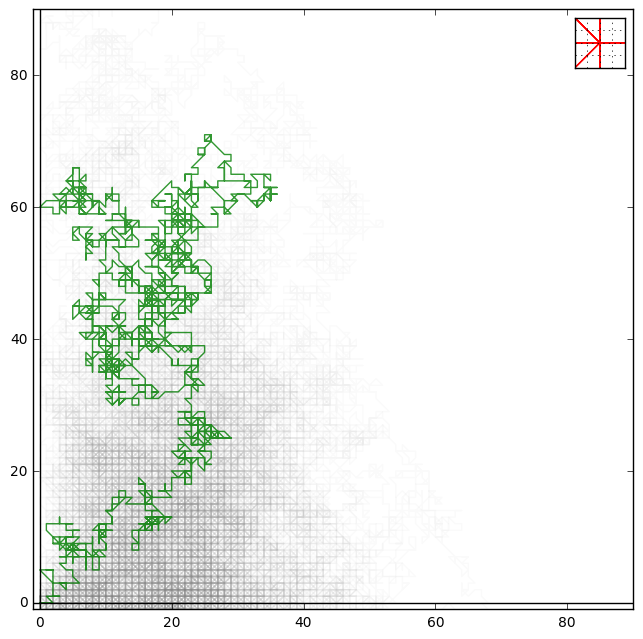

In [17]:
(cfig, cax) = plot_walk_region(c_b_walks + [c_r_walks[1]], borders=(-1,-1, 90, 90), inset_stepset=c_ssp, inset_loc=1)

In [18]:
afig.savefig("example_a.png")
bfig.savefig("example_b.png")
cfig.savefig("example_c.png")